***Written By :***

**Hakim Amraoui**  
**Matthieu de Castelbajac**

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>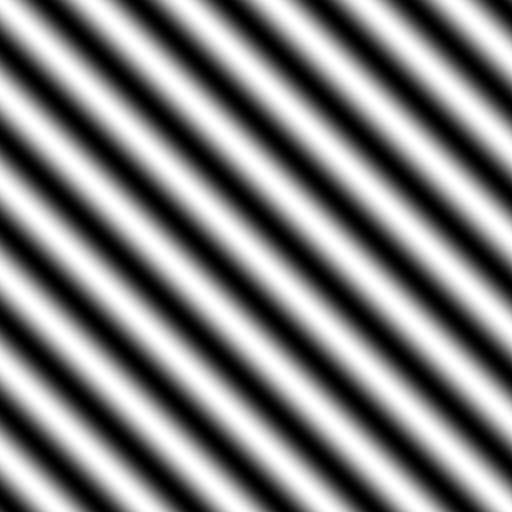</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [12]:
import numpy as np
from numpy.fft import fft2, fftshift, ifft2
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
from TME2 import toVisualizeFT, toVisualizeLogFT, computeFT
from math import sqrt

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Te=1`.


<IPython.core.display.Javascript object>


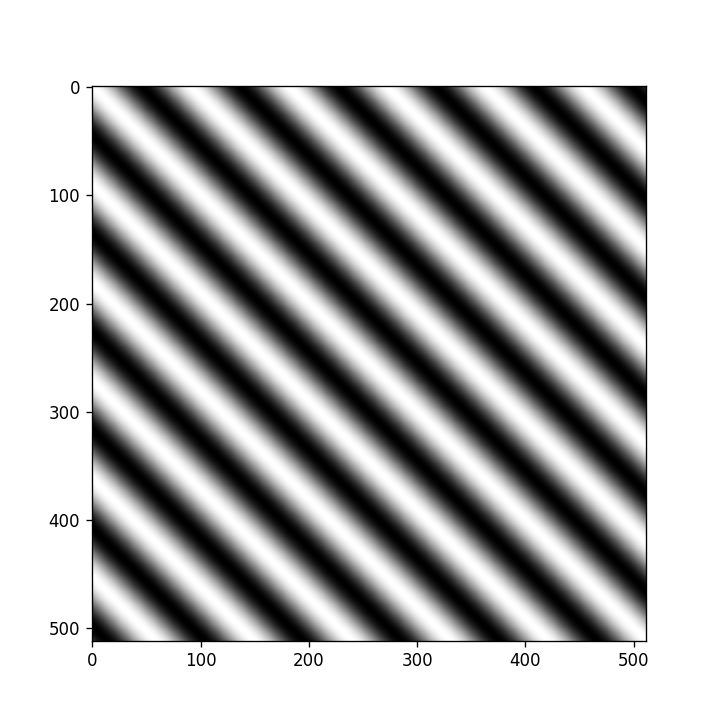

In [30]:
s = sinusoid2d(1,45,512,64,1)
imshow(s)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

Avec $s_{\theta = 45} =  A\cos(2\pi f_0(t\cos\theta + u\sin\theta))$

**As $\theta = 45°$, $s_{45} (t,u) =  A\cos(2\pi f_0 cos\Theta (t+u))$**    
**with $f^{max}_{t} = f_{u}^{max} = cos\theta f_0$ in both directions**

**Thus, we have : $\frac{\sqrt{2}}{2}f_0 = f_m$**  
**Value : $f_m = \frac{\sqrt{2}}{64*2} \approx 0,011$**


In the general case, though, $f_m$ would be written as $max(cos\theta, sin\theta)*f_0$

In [136]:
def getMinPeriod(theta, t0):
    return t0/max(np.cos(np.deg2rad(theta)), np.sin(np.deg2rad(theta)))

2. (b)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


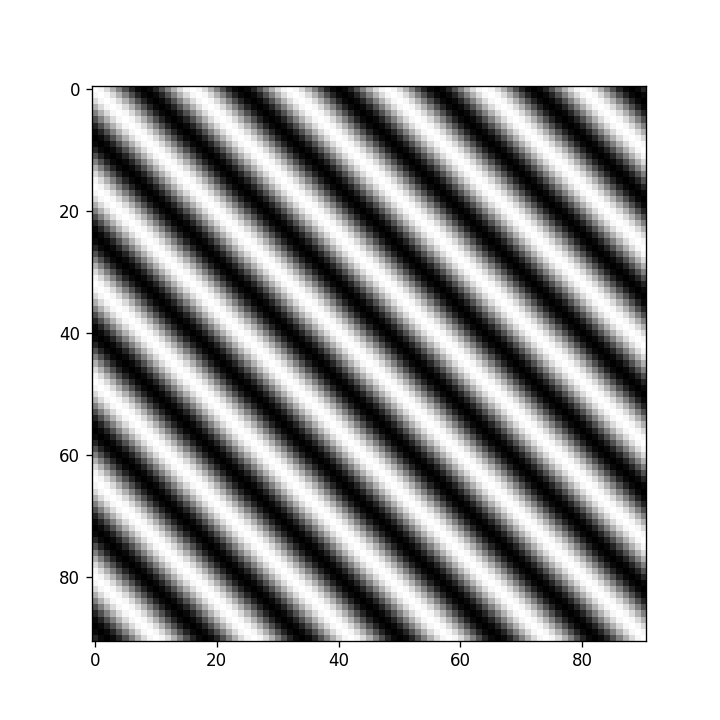

In [139]:
sampled = sinusoid2d(1,45,512,64,getMinPeriod(45,64)/16)
imshow(sampled)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


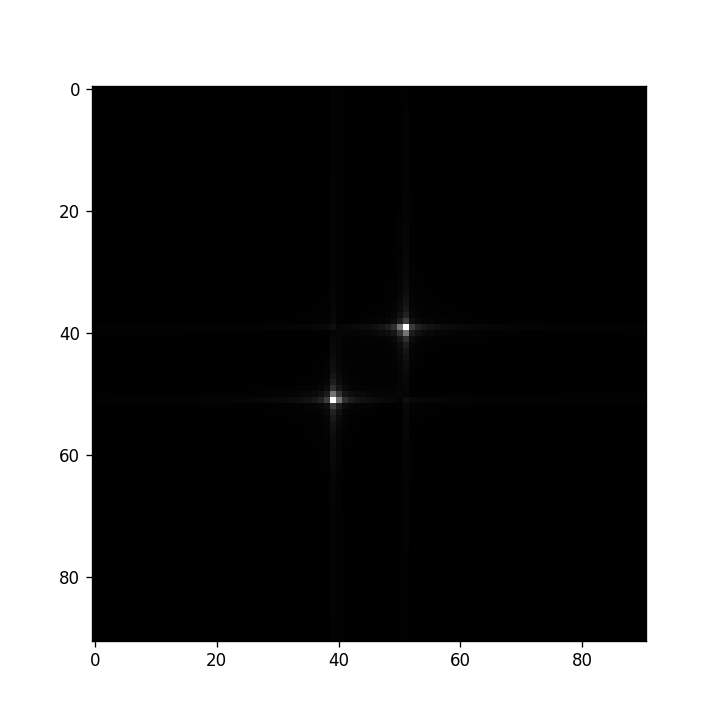

In [141]:
ft = toVisualizeFT(fftshift(fft2(sampled)))
imshow(ft)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

**We do see (in red) the two Dirac peaks**

**In theory, the higher $T_e$ is (the lesser $f_e$) the worse our sampled signal should be**

<IPython.core.display.Javascript object>


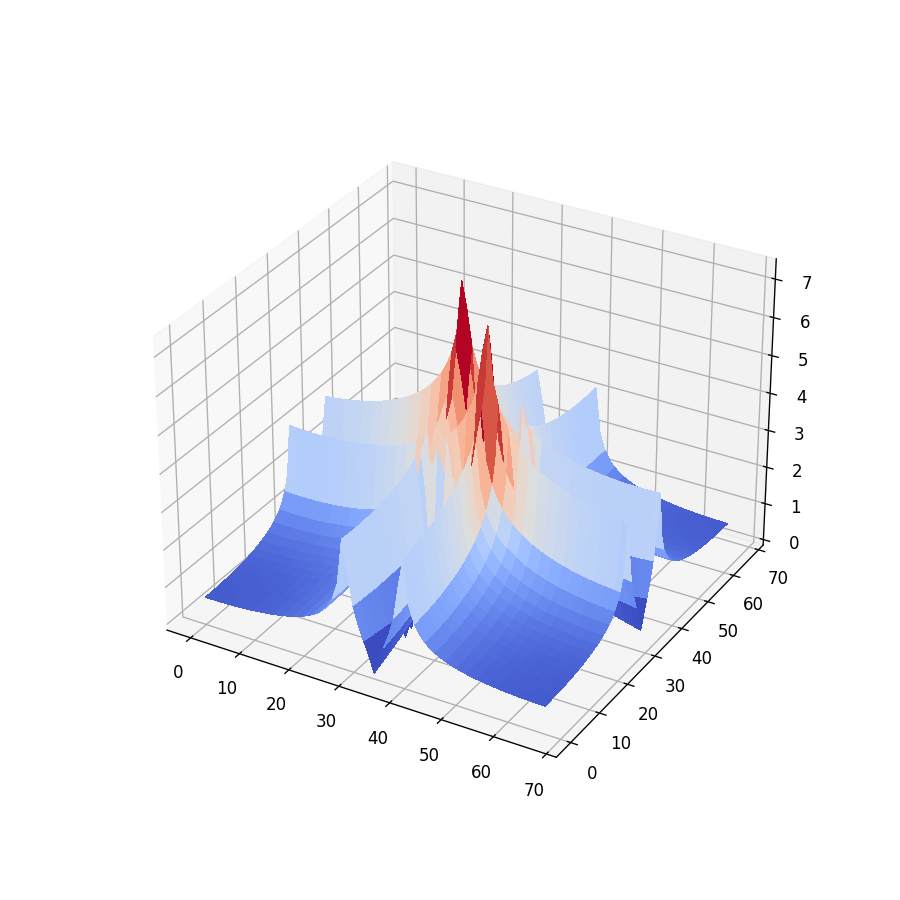

/tmp/ipykernel_2909/2957826934.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


<IPython.core.display.Javascript object>


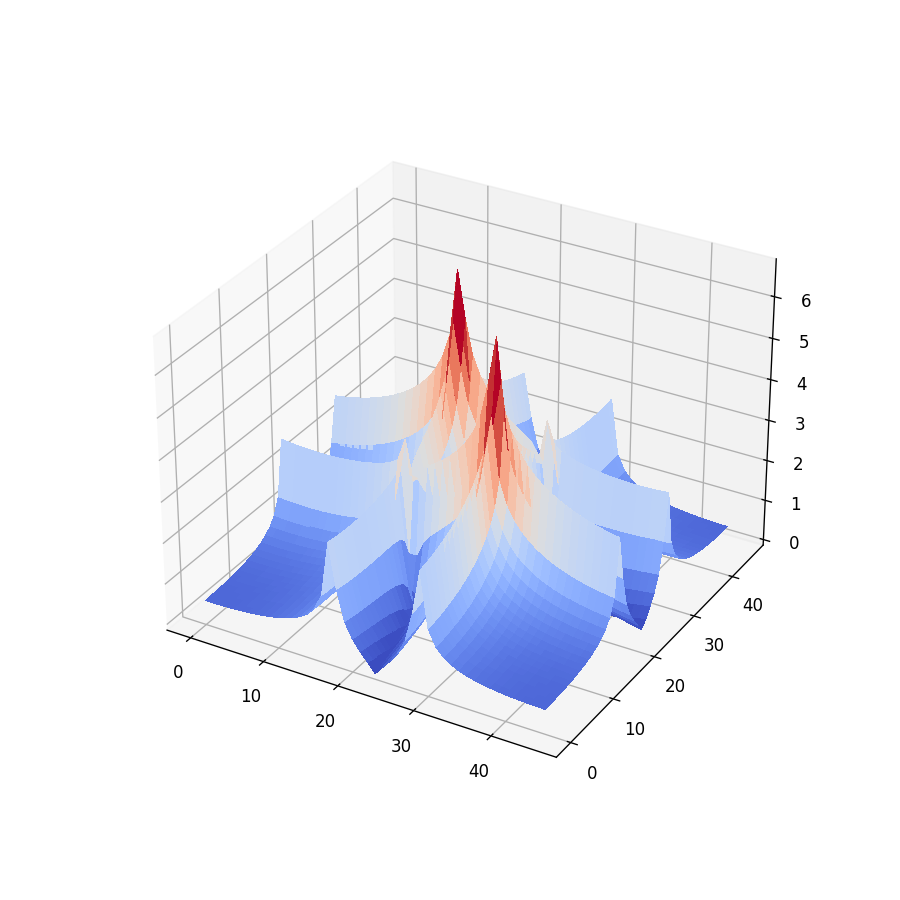

<IPython.core.display.Javascript object>


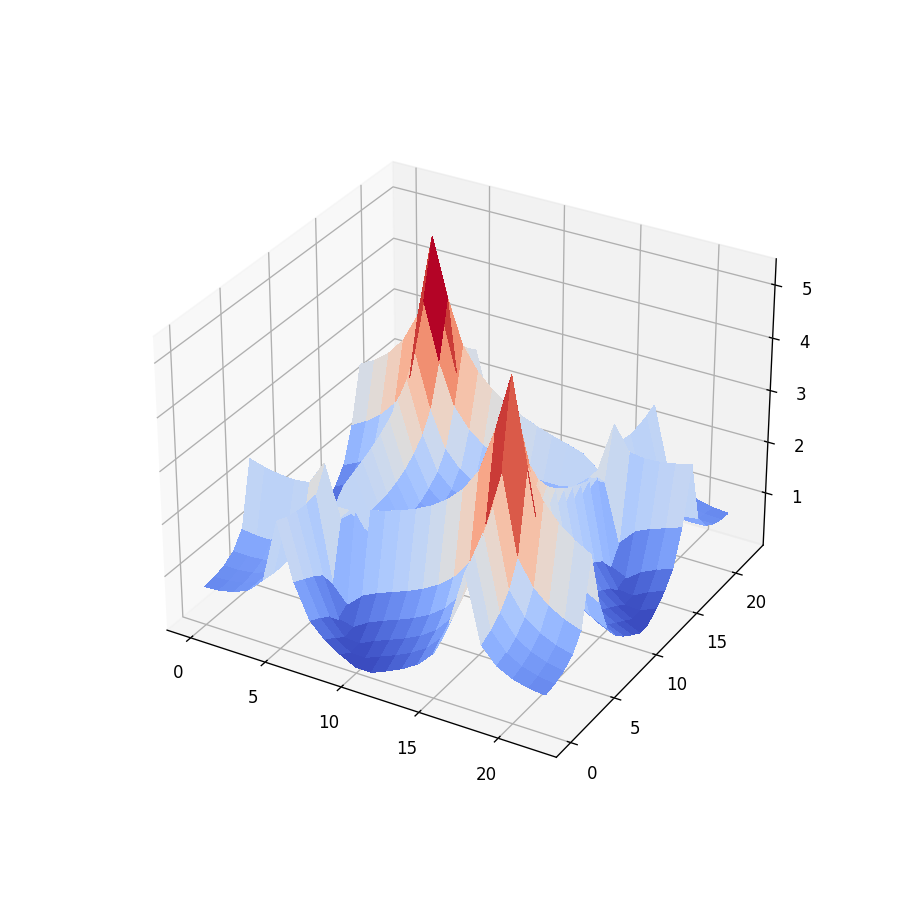

In [143]:
for i in range(12, 2, -4):
    ft = toVisualizeLogFT(fftshift(fft2(sinusoid2d(1,45,512,64,getMinPeriod(45,64)/i))))
    surf(ft)


**The higher the $T_e$, the lower the peaks.**

3. (a) Sample $s_{45}$ with $f_e=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


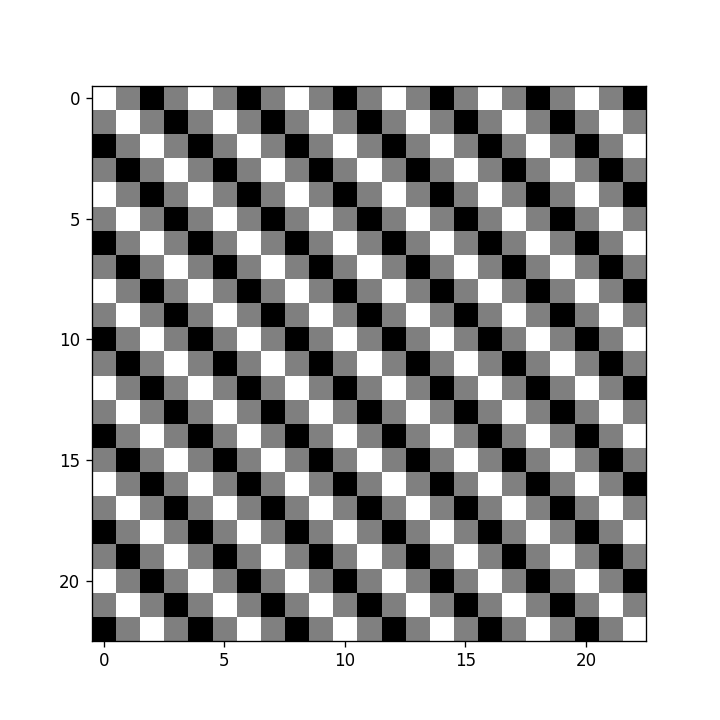

In [153]:
sampled = sinusoid2d(1,45,512,64,getMinPeriod(45,64)/4)
imshow(sampled)


3. (b) Write a function `error()` implementing the relative average error $$\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$$.

In [150]:
def error(A, L, s1, s2):
    return np.sum(np.abs(s1-s2))/(2*A*(L**2))

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


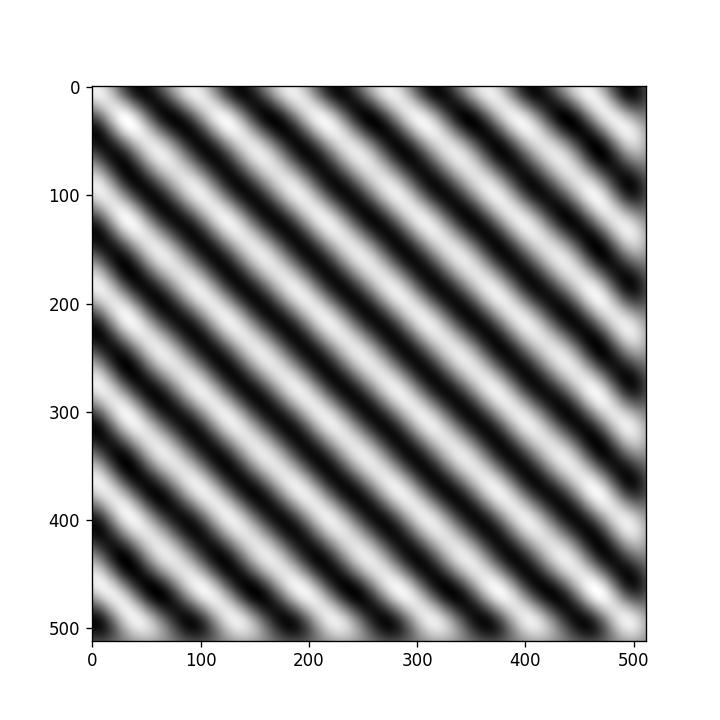

0.405128731001093


In [151]:
xr = shannonInterpolation(sampled, getMinPeriod(45,64)/4, 512)
imshow(xr)
print(error(1, 512, xr, s))

**Although we oversampled our original signal by a factor 2, we still got an average error of roughly 0,4 intensity value, meaning we didn't get any overlap but we still lost some precision, especially around edges during reconstruction.**   

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


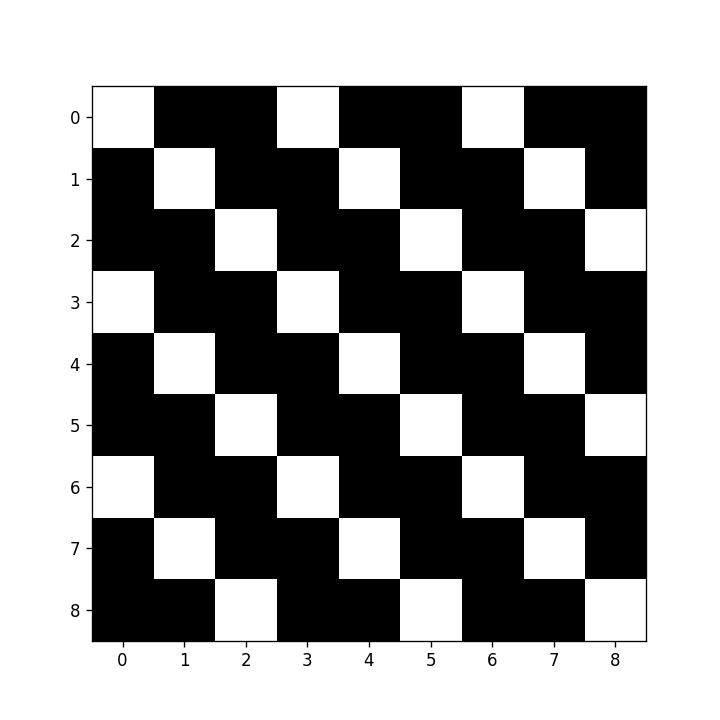

<IPython.core.display.Javascript object>


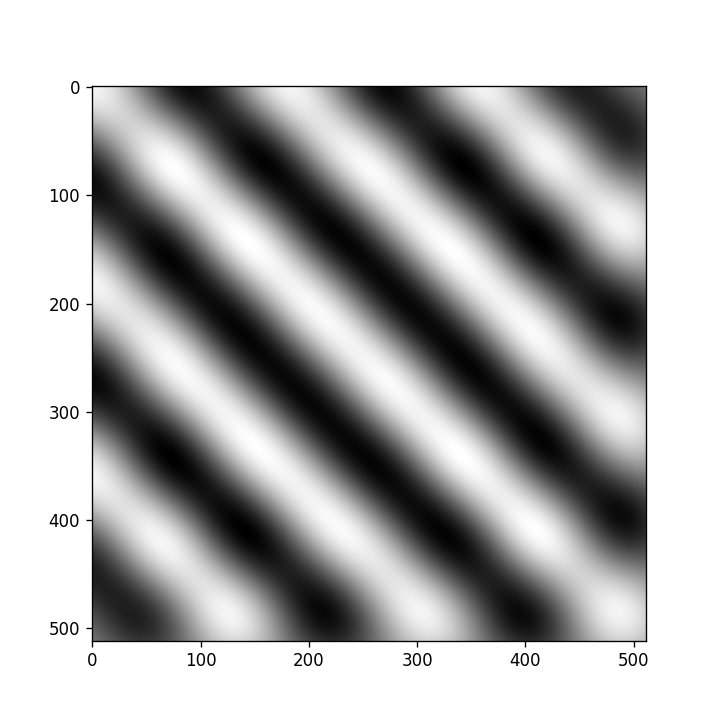

In [155]:
sampled = sinusoid2d(1,45,512,64,getMinPeriod(45,64)*2/3)
imshow(sampled)
xr = shannonInterpolation(sampled,getMinPeriod(45,64)*2/3, 512)
imshow(xr)

**For the first time the reconstructed signal is incorrect (here, the scale of our stripes is off, we lost some of them)**

**This results of us setting the sampling frequence below the Nyquist frequence**

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

<IPython.core.display.Javascript object>


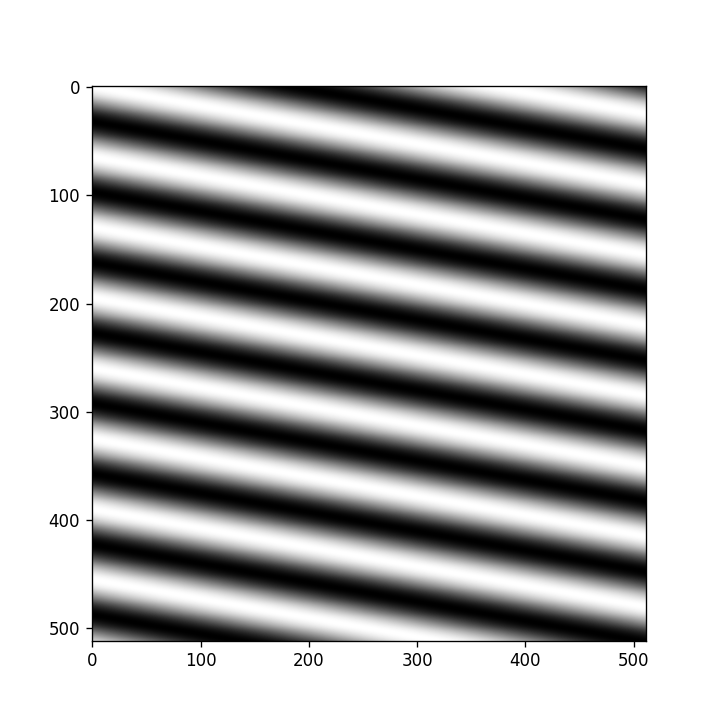

<IPython.core.display.Javascript object>


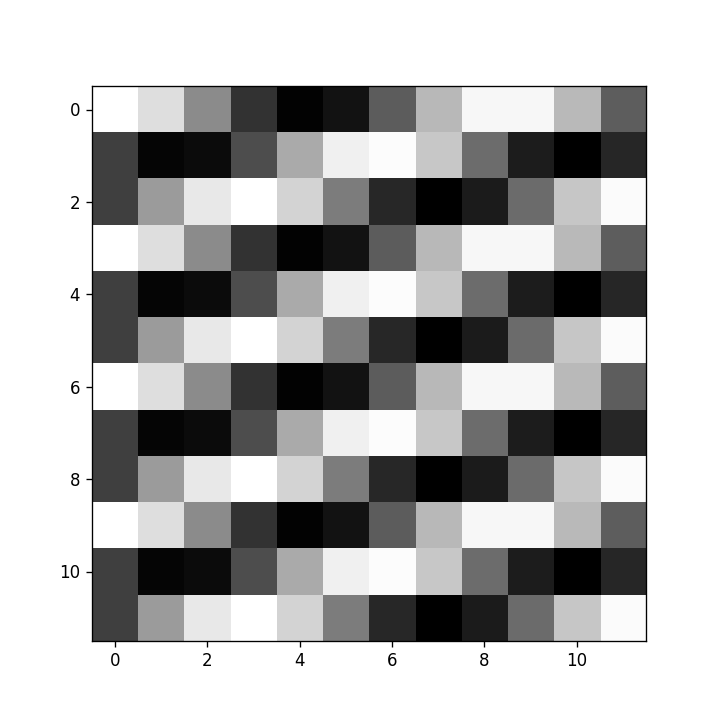

<IPython.core.display.Javascript object>


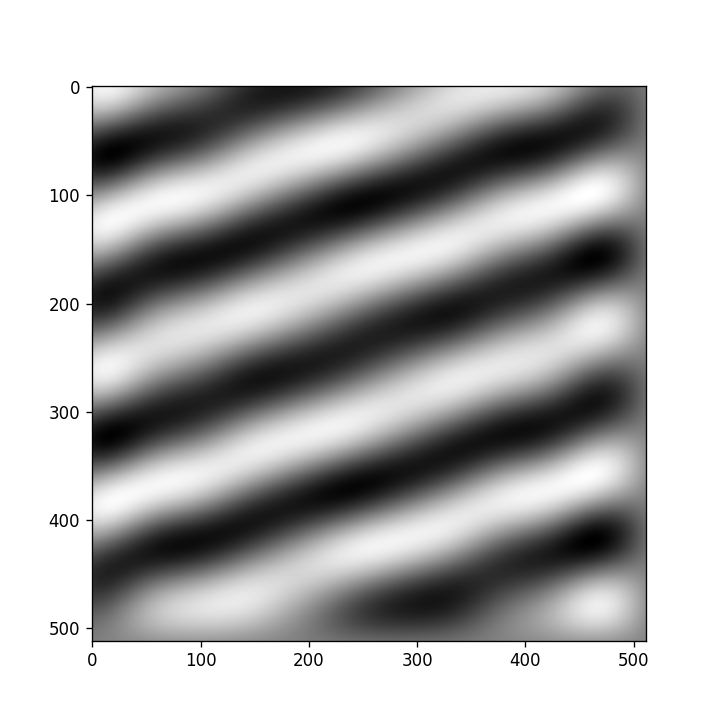

0.3982390747439288


In [156]:
s=sinusoid2d(1,10,512,64,1)
imshow(s)
sampled = sinusoid2d(1,10,512,64,getMinPeriod(10,64)*2/3)
imshow(sampled)
xr = shannonInterpolation(sampled, getMinPeriod(10,64)*2/3,512)
imshow(xr)
print(error(1, 512, s, xr))

**Not only did we lose information here (meaning stripes), we also have an additionnal drawback due to poor sampling with $\theta = 10°$ : a false rotation to angle $-\theta$.**

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [157]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

def shannonInterpolationLoop(I, Te, size):
    n, m = I.shape
    X = np.zeros((n, size))
    Y = np.zeros((m, size))
    
    for i in range(max(n,m)):
        for j in range(size):
            if i <= n:
                X[j,i] = np.sinc(j/Te-i)
            if i <= m:
                Y[i,j] = np.sinc(j/Te-i)        
    
    return np.matmul(X, np.matmul(I, Y))


0.07549511800004893


<IPython.core.display.Javascript object>


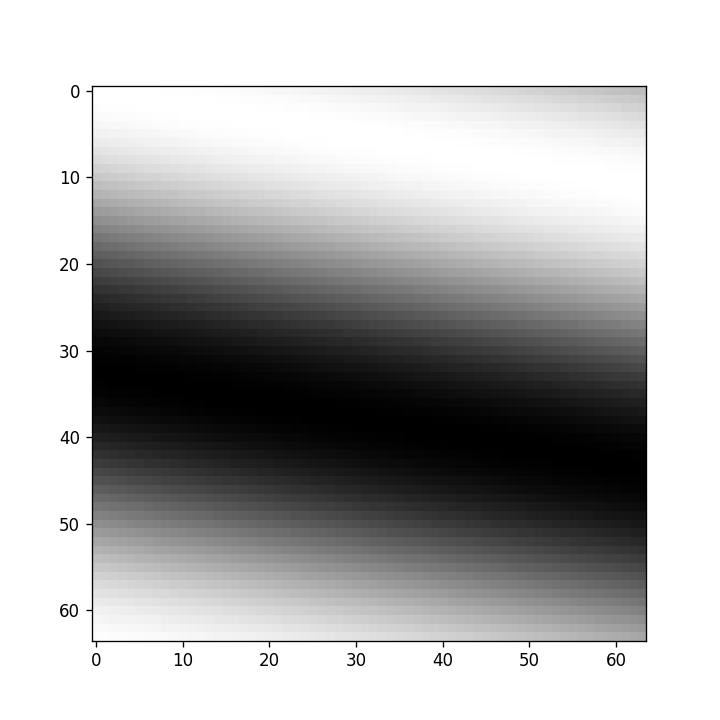

In [158]:
sampled = sinusoid2d(1,10,64,64,1)
tic()
xr = shannonInterpolationLoop(sampled, 1, 64)
tac()
imshow(xr)

0.00281321699998216


<IPython.core.display.Javascript object>


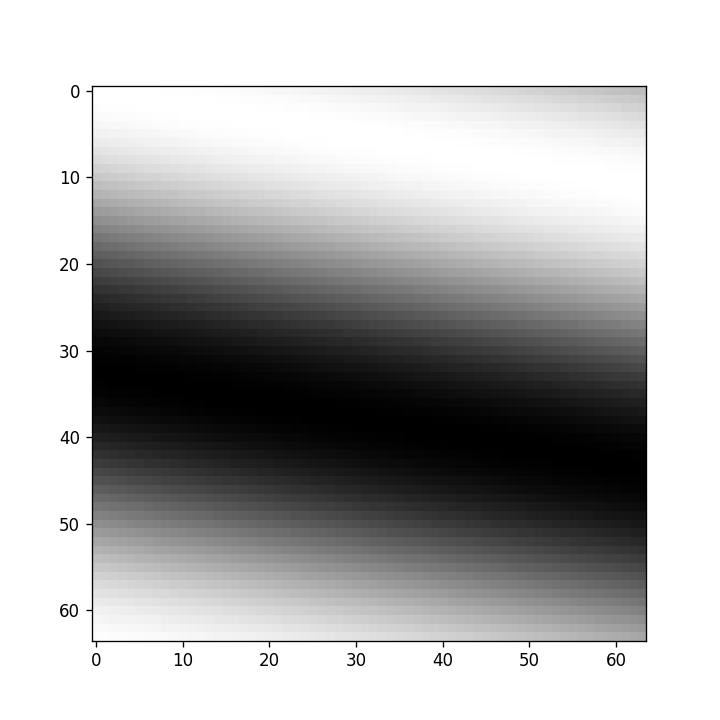

In [159]:
tic()
xr = shannonInterpolation(sampled, 1, 64)
tac()
imshow(xr)

**Using `Numpy` is more than 20 times more effective (only on meshgrid ! 3-for-loop matrice naïve multiplication would be even worse).  
Whence the importance of relying on numpy already optimized tools to when it comes to image processing.**


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [8]:
from PIL import Image

    
# barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I, factor = 2):
    """ Array -> Array """
    return I[::factor,::factor]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

Subsampling an image is resizing the image by a factor, a factor 2 in that case. It's taking a $f_s$ and applying to the image a sampling who respects the Nyquist-Shannon theorem.
Then, a subsample of factor 2 is sampling by 2$f_s$.

This will result by reducing the original image's dimension by 2. 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

<IPython.core.display.Javascript object>


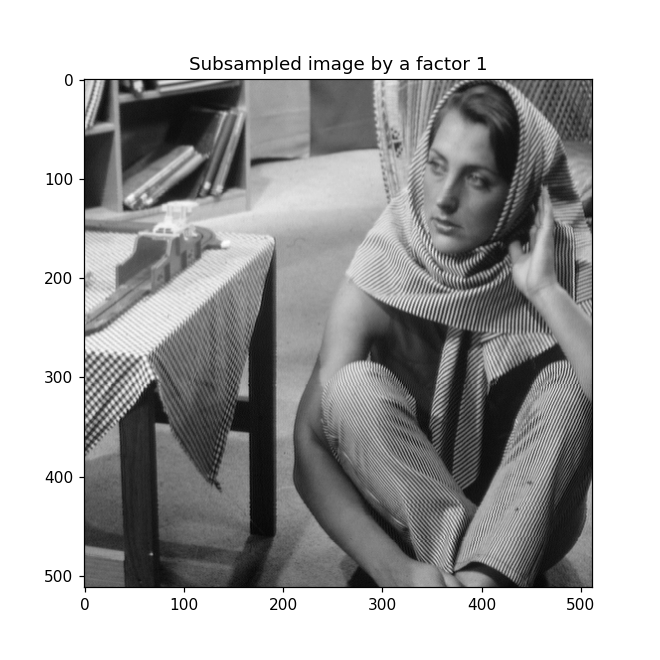

<IPython.core.display.Javascript object>


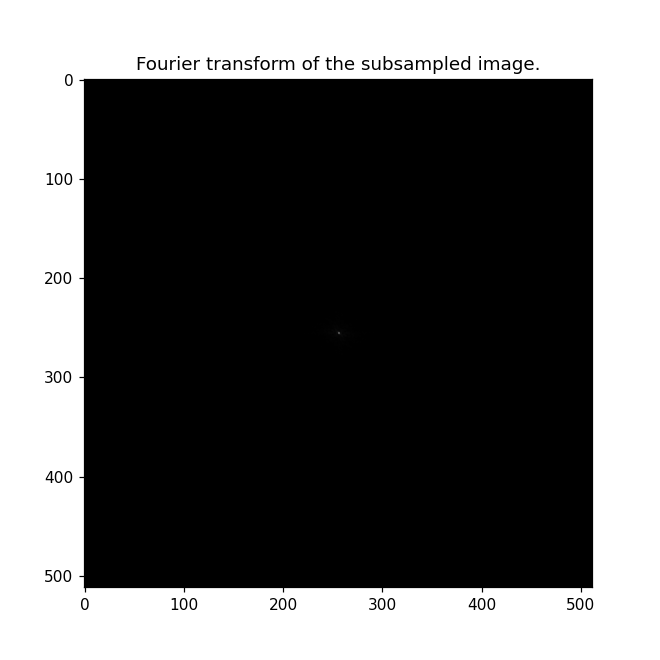

<IPython.core.display.Javascript object>


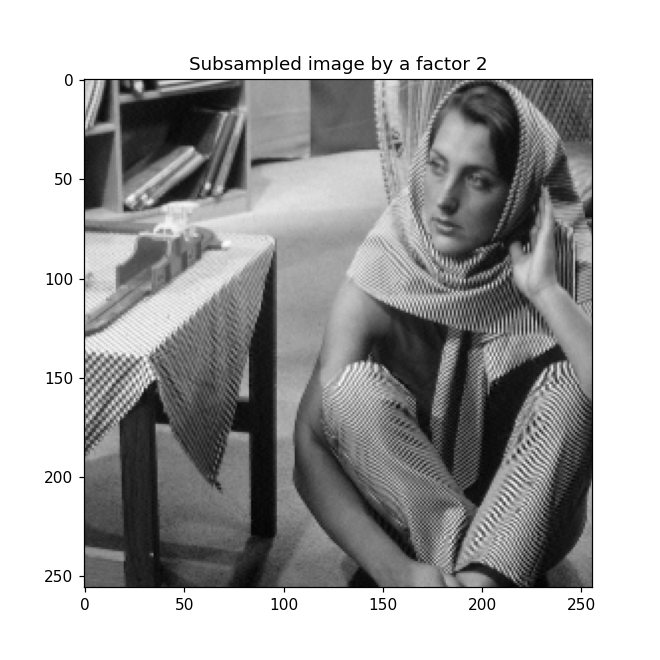

<IPython.core.display.Javascript object>


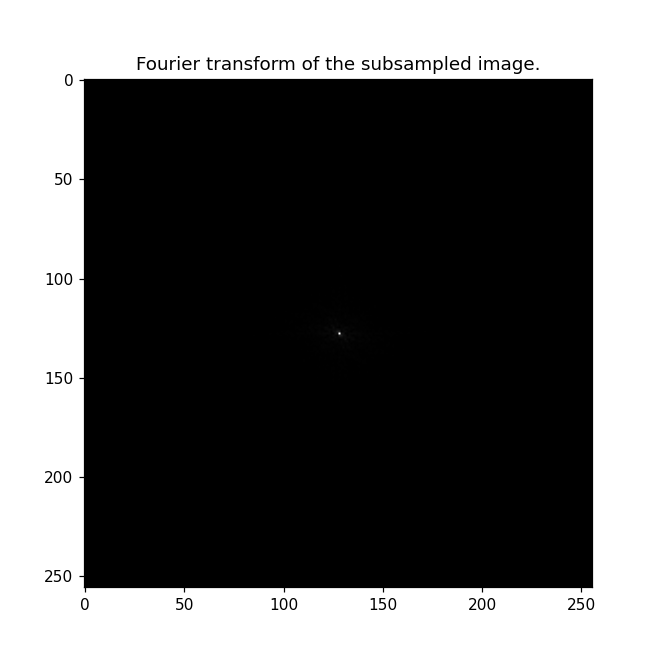

<ipython-input-12-8e3f172d2fb4>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(500//80,500//80))


<IPython.core.display.Javascript object>


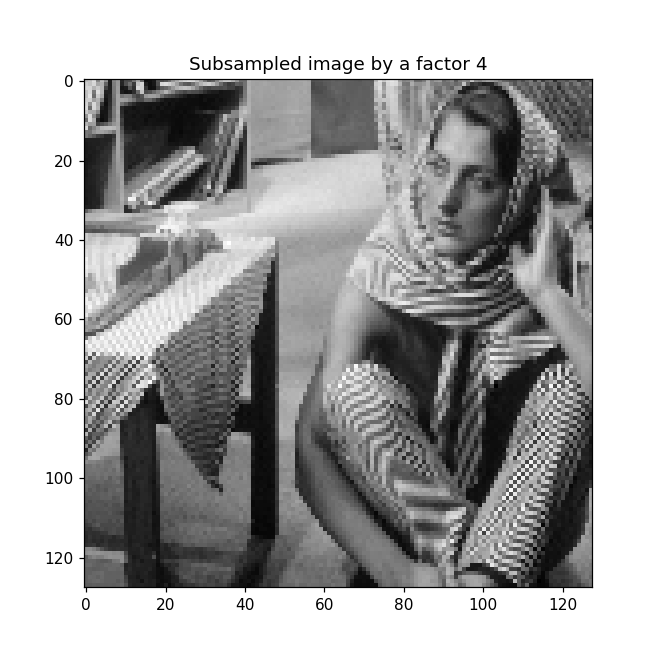

<IPython.core.display.Javascript object>


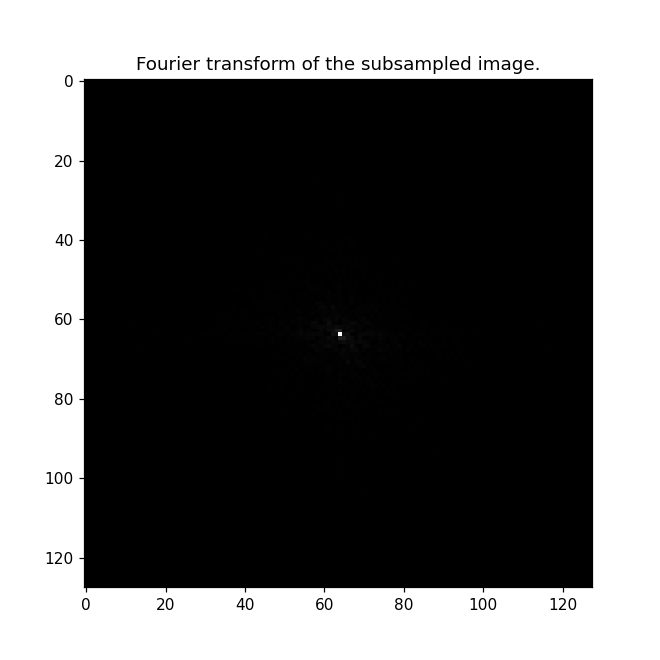

<IPython.core.display.Javascript object>


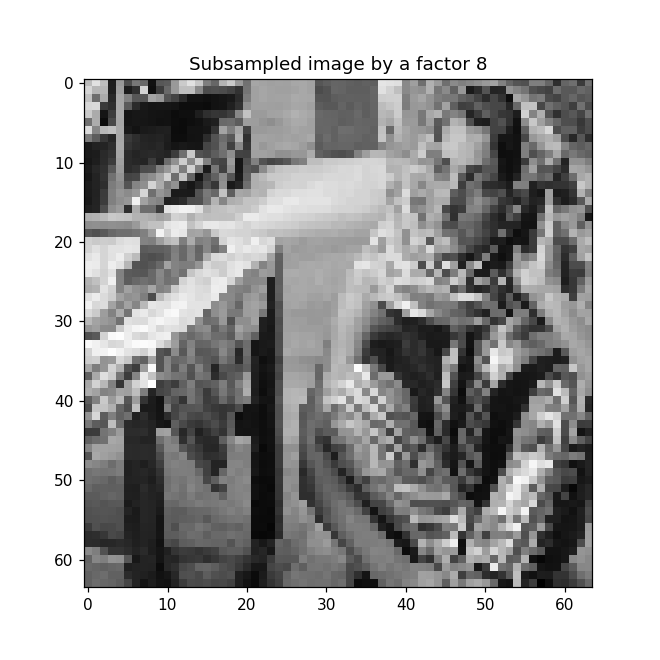

<IPython.core.display.Javascript object>


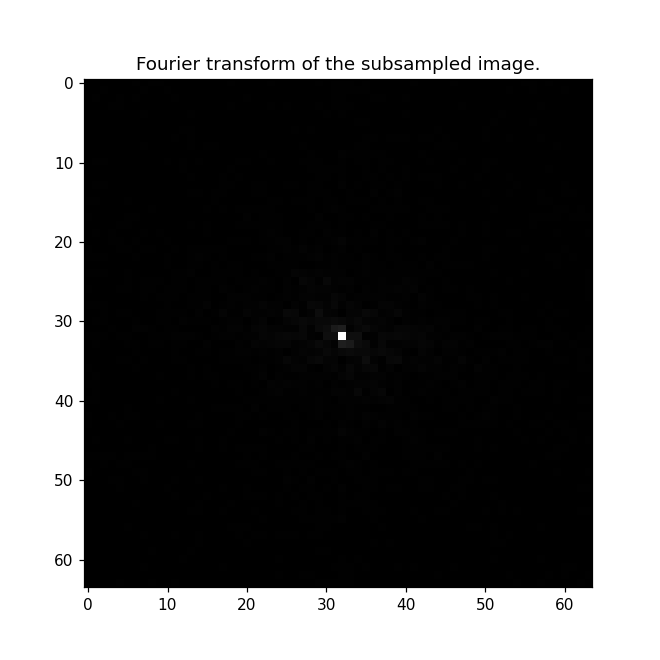

<IPython.core.display.Javascript object>


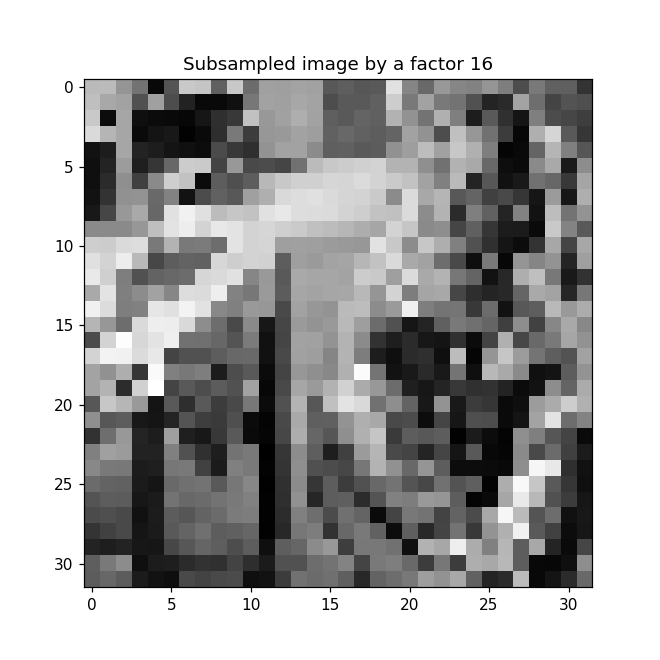

<IPython.core.display.Javascript object>


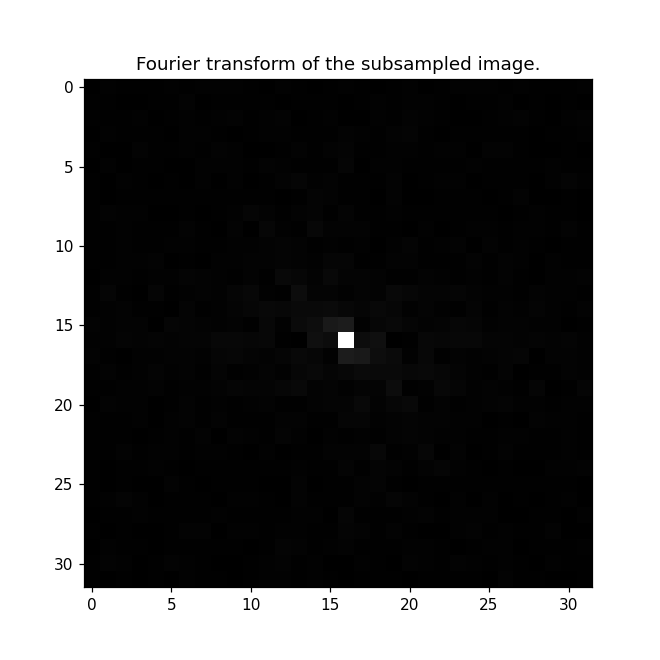

<IPython.core.display.Javascript object>


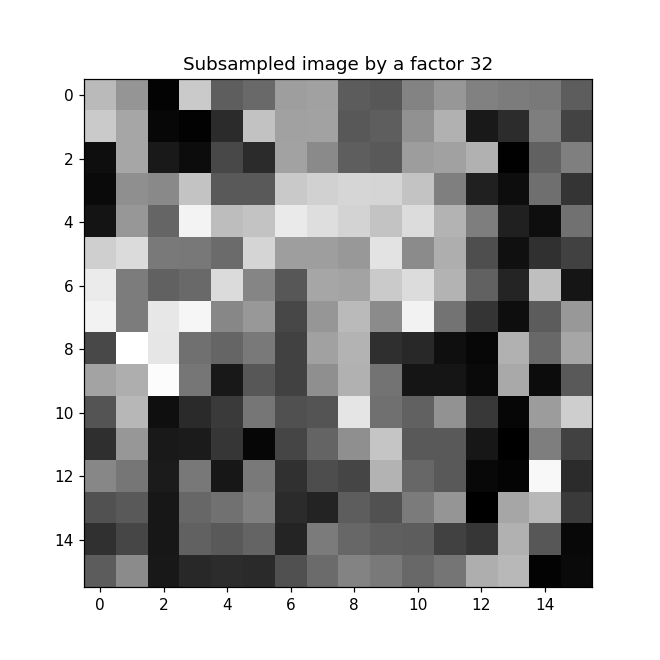

<IPython.core.display.Javascript object>


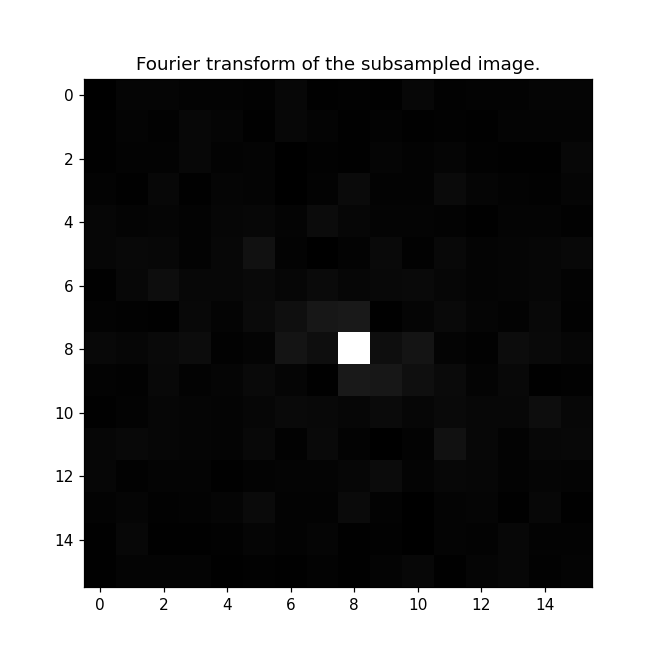

<IPython.core.display.Javascript object>


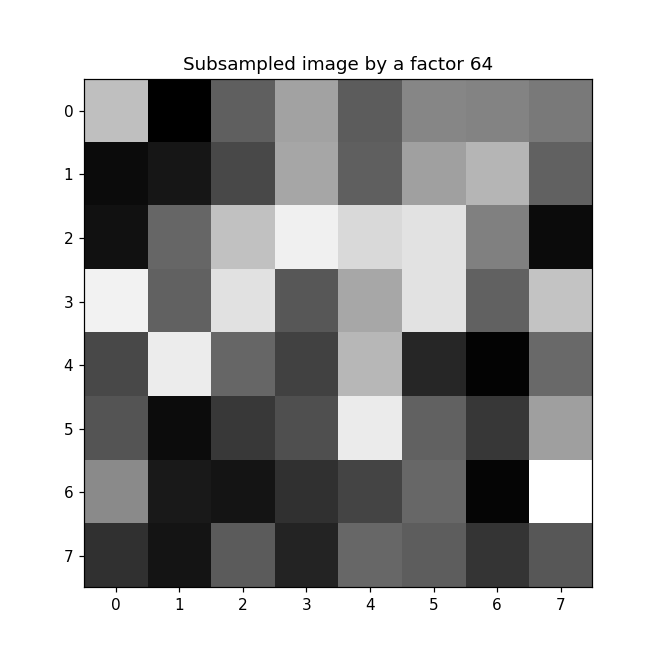

<IPython.core.display.Javascript object>


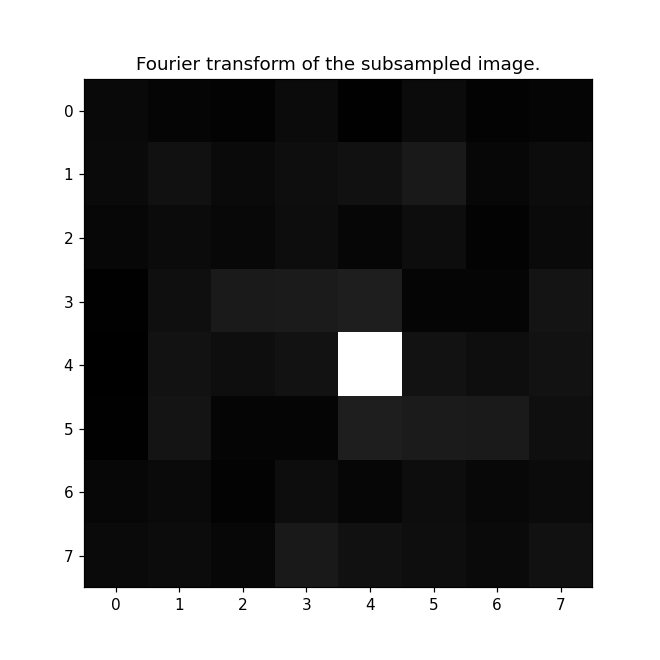

<IPython.core.display.Javascript object>


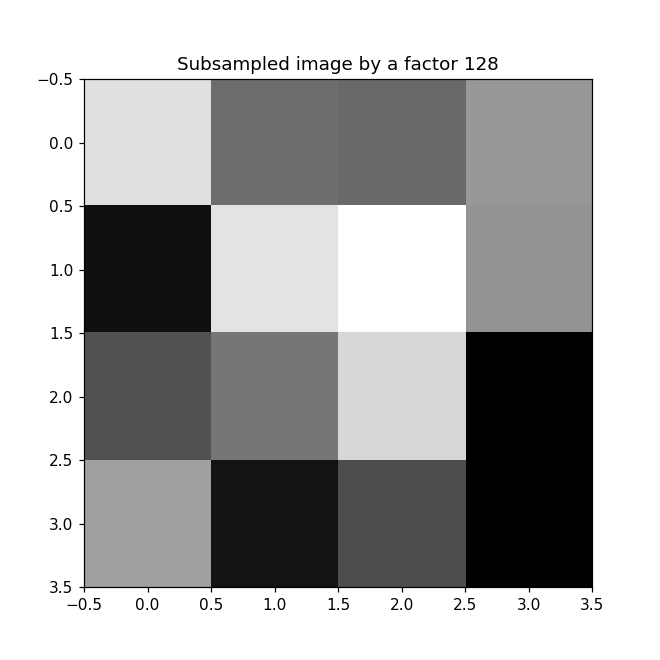

<IPython.core.display.Javascript object>


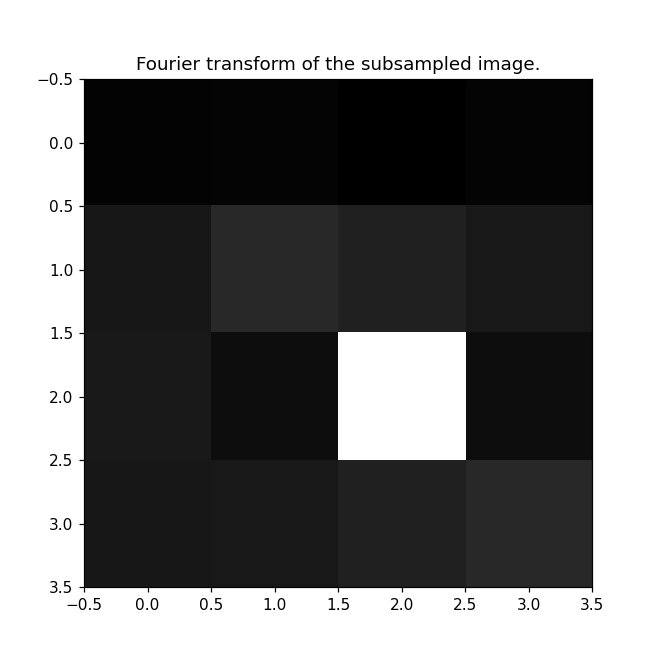

In [19]:
for x in range (0, 8):
    s = 2 ** x
    img = subSample2(barbara, s)
    imshow(img, f"Subsampled image by a factor {s}")
    imshow(toVisualizeFT(computeFT(img)), 'Fourier transform of the subsampled image.')


We can see that when we subsample by a factor 2, some details on the pants are missing, this is the alising.
When we look at the subsample by a factor 4, so much information is lost. This is the aliasing you really don't want to see.

3. Bonus question: same question with the image `img/mandrill.png`.

<IPython.core.display.Javascript object>


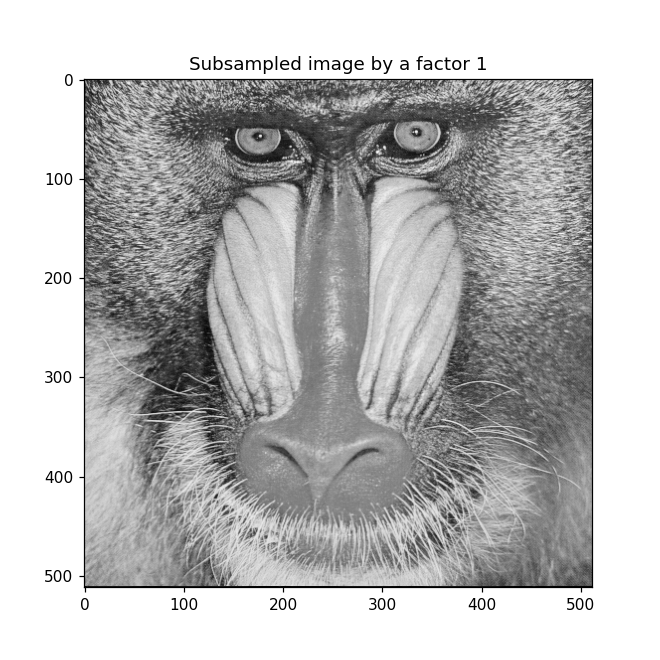

<IPython.core.display.Javascript object>


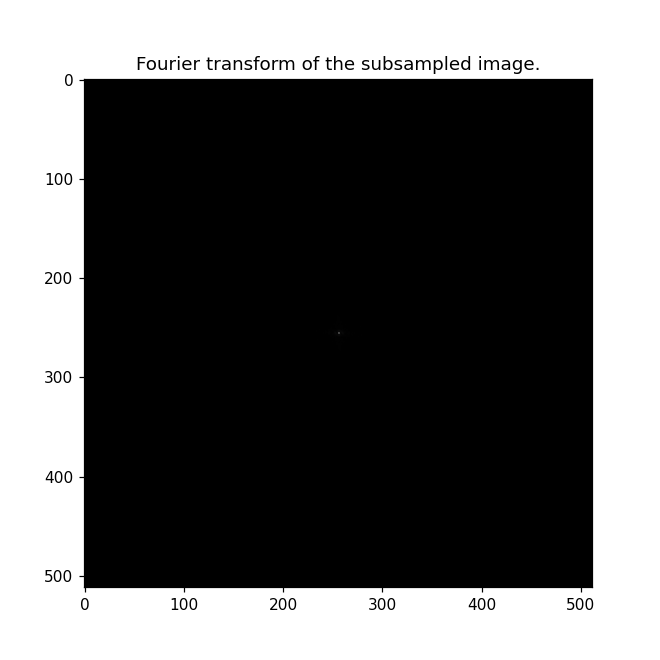

<IPython.core.display.Javascript object>


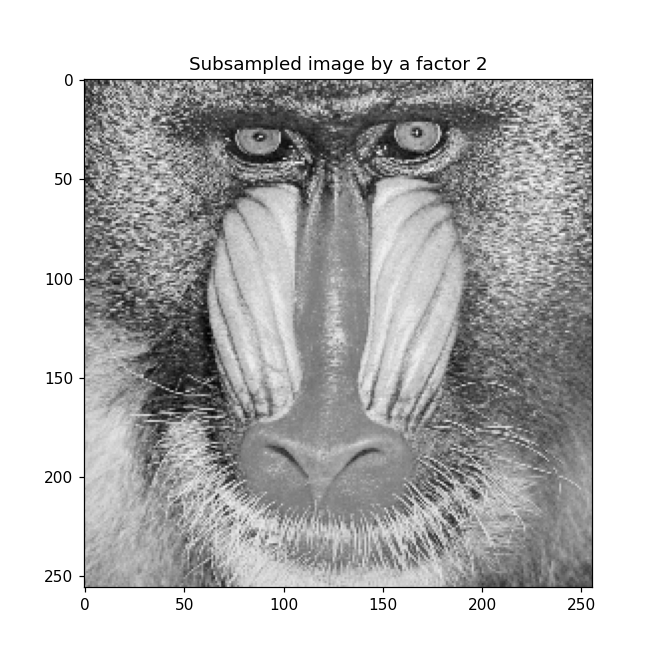

<IPython.core.display.Javascript object>


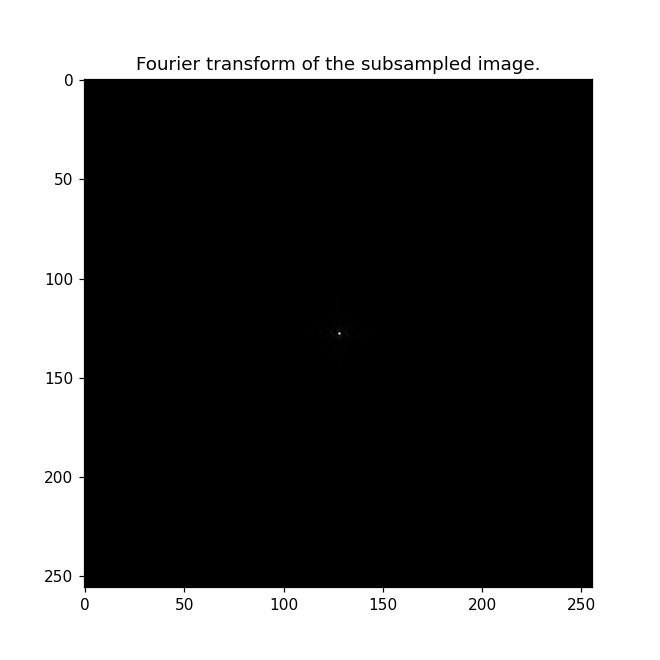

<ipython-input-12-8e3f172d2fb4>:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(500//80,500//80))


<IPython.core.display.Javascript object>


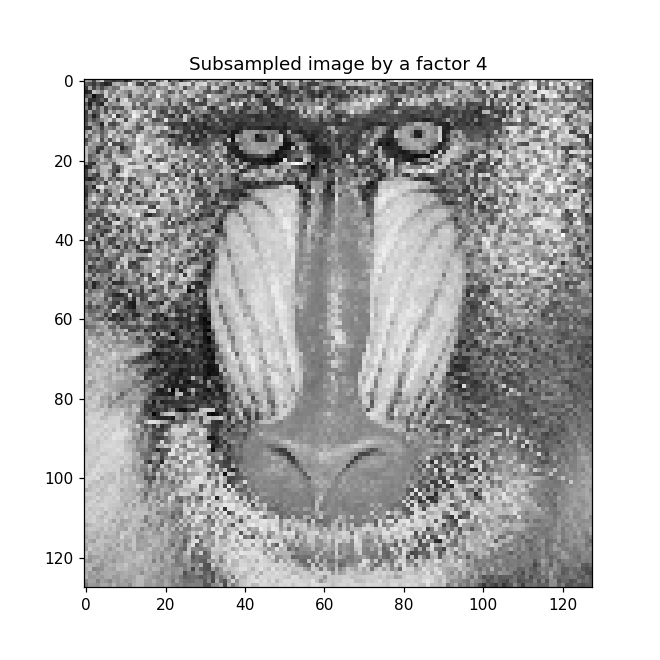

<IPython.core.display.Javascript object>


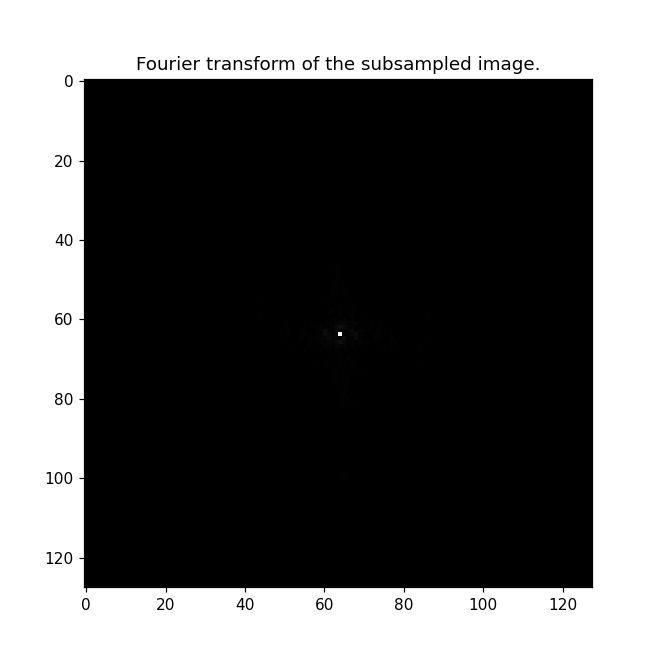

<IPython.core.display.Javascript object>


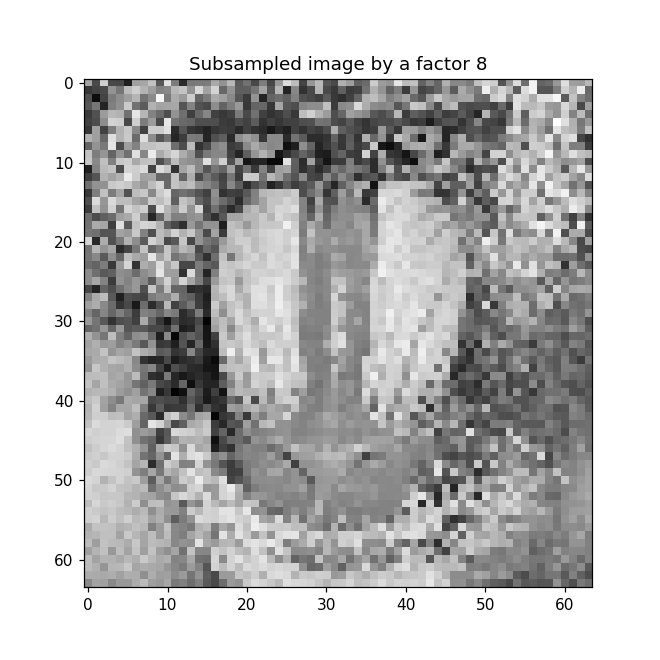

<IPython.core.display.Javascript object>


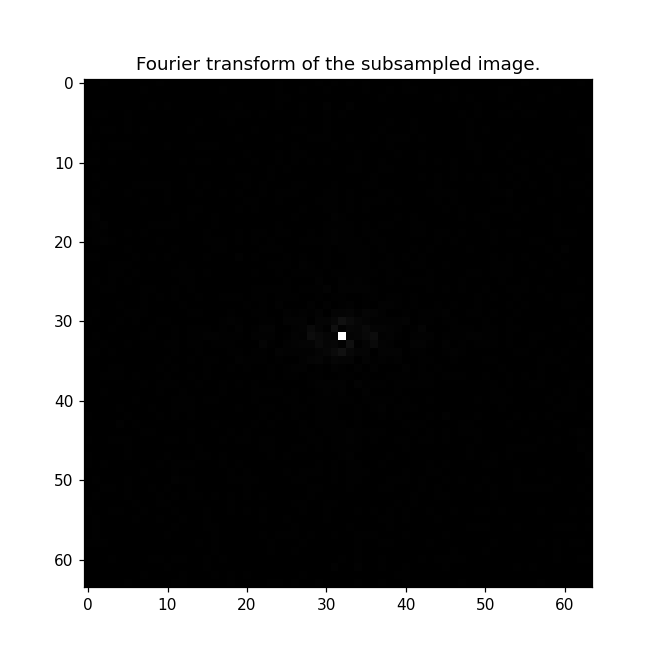

<IPython.core.display.Javascript object>


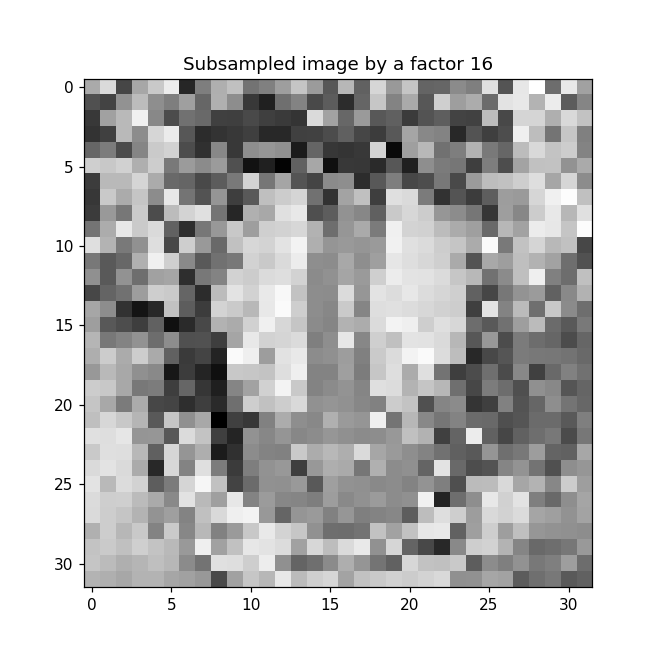

<IPython.core.display.Javascript object>


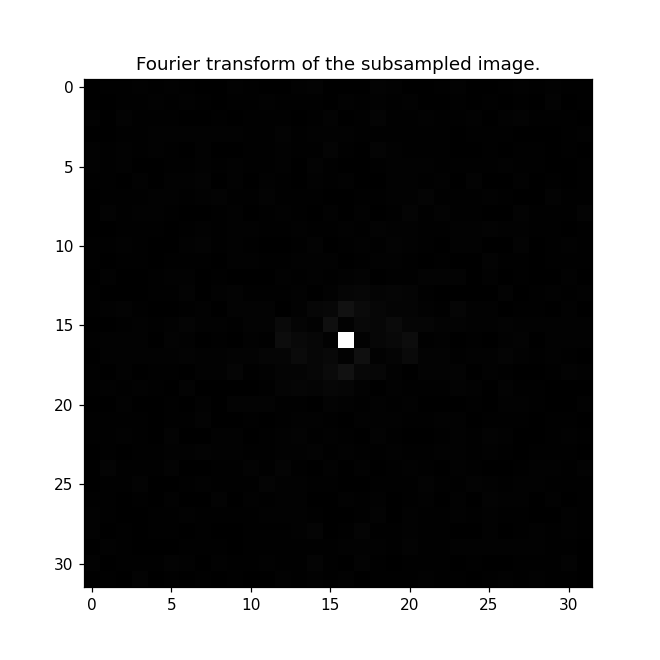

<IPython.core.display.Javascript object>


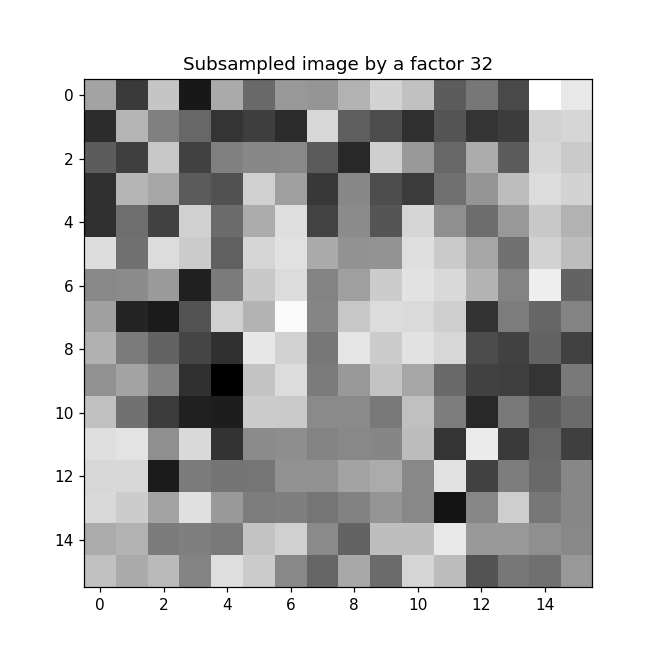

<IPython.core.display.Javascript object>


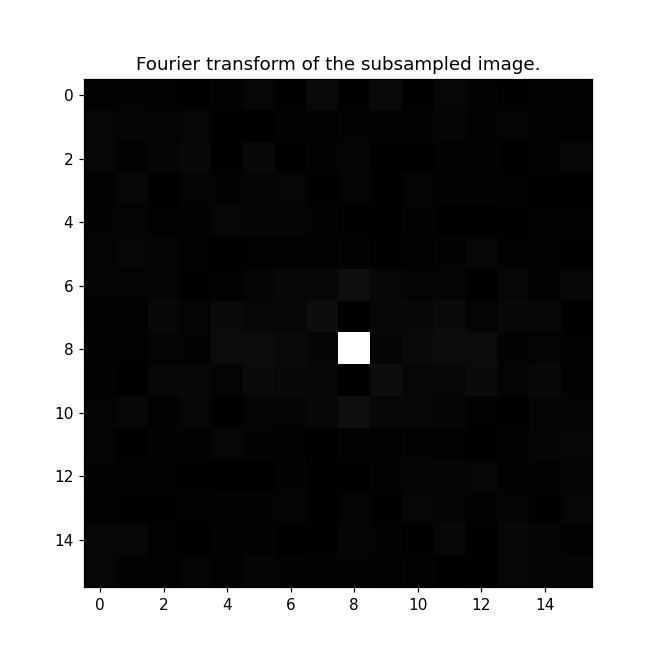

<IPython.core.display.Javascript object>


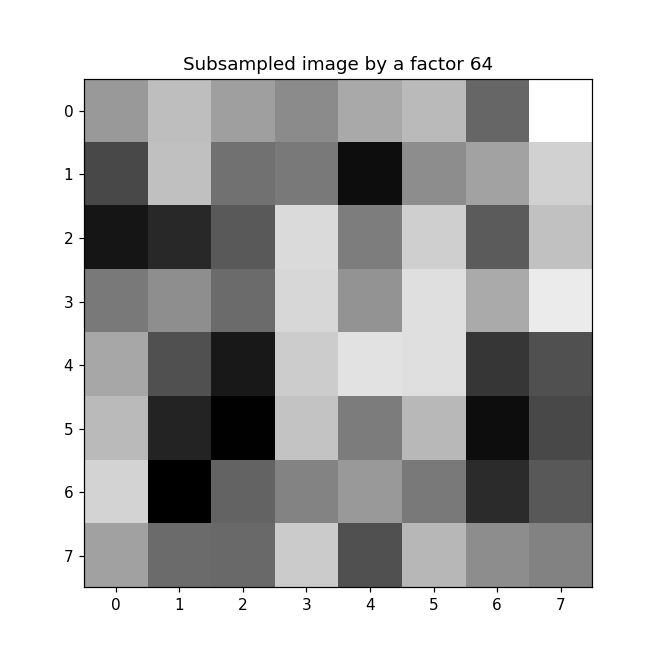

<IPython.core.display.Javascript object>


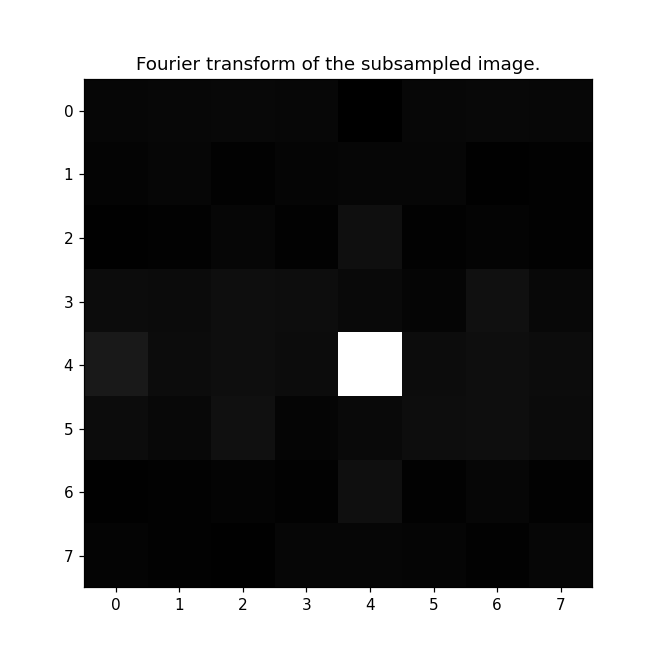

<IPython.core.display.Javascript object>


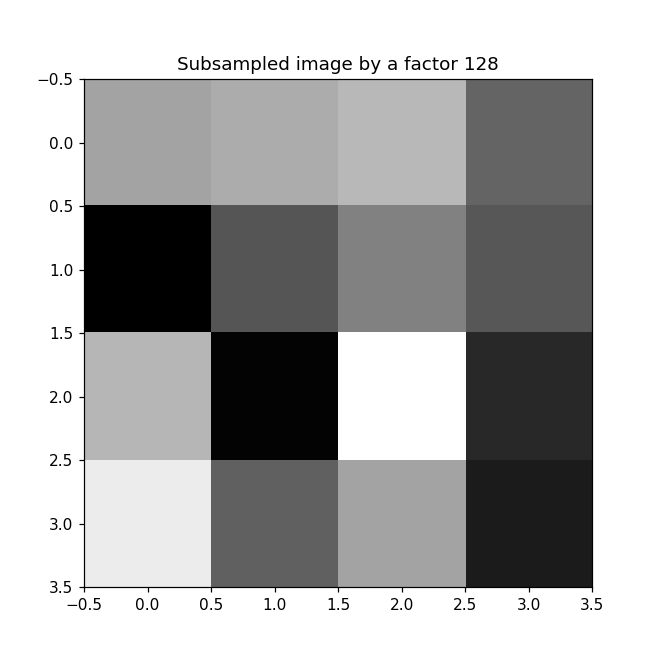

<IPython.core.display.Javascript object>


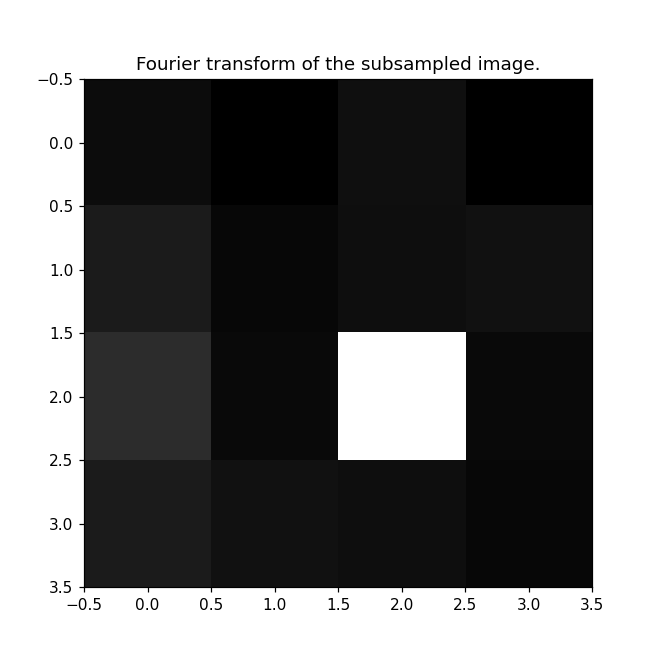

In [20]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below

for x in range (0, 8):
    s = 2 ** x
    img = subSample2(mandrill, s)
    imshow(img, f"Subsampled image by a factor {s}")
    imshow(toVisualizeFT(computeFT(img)), 'Fourier transform of the subsampled image.')
